1. Installing numpy, matplotlib, pandas, tensorflow, sklearn and pytorch

In [1]:
!pip install tensorflow
!pip install torch
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib

2. Importing the libraries for future usage

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import torch
import matplotlib.pyplot as plt
import random

*Help Functions*

In [2]:
def load_mnist():
  mnist = tf.keras.datasets.mnist
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  return x_train, y_train, x_test, y_test

def build_model(x_train, y_train, x_test, y_test):
  # Normalizing the pixel values to [0, 1] range
  x_train = x_train / 255.0
  x_test = x_test / 255.0

  # Convert the labels to one-hot encoding
  y_train = tf.keras.utils.to_categorical(y_train, 10)
  y_test = tf.keras.utils.to_categorical(y_test, 10)

  # Building the NN
  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

  # Compile the model
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  # Train the model
  history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  print(f"Test Loss: {test_loss:.4f}")
  print(f"Test Accuracy: {test_accuracy:.4f}")

  # Make the predictions on the test set
  y_pred = model.predict(x_test)
  y_pred_classes = np.argmax(y_pred, axis=1)

  # Calculate precision, recall, F1 score, sensitivity and specificty
  precision = metrics.precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
  recall = metrics.recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
  f1_score = metrics.f1_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')

  sensitivity = recall

  # Calculate the confusion matrix to calculate the specificity
  cm = sk.metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
  # print(cm)
  tn = cm.sum(axis=1) - cm.diagonal()
  fp = cm.sum(axis=0) - cm.diagonal()
  fn = cm.sum(axis=1) - cm.diagonal()
  specificity = tn / (tn + fp)
  specificity = specificity.mean()

  return cm, precision, recall, f1_score, sensitivity, specificity, test_accuracy, history

# Building the model for PCA
def build_model_reduced(x_train, y_train, x_test, y_test, is_pca):
  # Convert the labels to one-hot encoding
  y_train = tf.keras.utils.to_categorical(y_train, 10)
  y_test = tf.keras.utils.to_categorical(y_test, 10)

  if not is_pca:
    x_train = x_train / 255.0
    x_test = x_test / 255.0

  # Building the NN
  if not is_pca:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(x_train.shape[1], x_train.shape[2])),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
  else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, input_shape=(x_train.shape[1],), activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

  # Compile the model
  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  # Train the model
  history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  print(f"Test Loss: {test_loss:.4f}")
  print(f"Test Accuracy: {test_accuracy:.4f}")

  # Make the predictions on the test set
  y_pred = model.predict(x_test)
  y_pred_classes = np.argmax(y_pred, axis=1)

  # Calculate precision, recall, F1 score, sensitivity and specificty
  precision = metrics.precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
  recall = metrics.recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
  f1_score = metrics.f1_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')

  sensitivity = recall

  # Calculate the confusion matrix to calculate the specificity
  cm = sk.metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
  # print(cm)
  tn = cm.sum(axis=1) - cm.diagonal()
  fp = cm.sum(axis=0) - cm.diagonal()
  fn = cm.sum(axis=1) - cm.diagonal()
  specificity = tn / (tn + fp)
  specificity = specificity.mean()

  return cm, precision, recall, f1_score, sensitivity, specificity, test_accuracy, history

# Applying the 3x3 block averaging
def block_avg(image, block_size=3):
  (h, w) = image.shape
  new_h, new_w = h // block_size, w // block_size
  result = np.zeros((new_h, new_w))
  for i in range(new_h):
    for j in range(new_w):
      block = image[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size]
      result[i, j] = np.mean(block)
  return result

# Printing the results
def print_results(cm, precision, recall, f1_score, sensitivity, specificity, accuracy):
  print("Confusion Matrix:")
  print(cm)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1_score)
  print("Sensitivity:", sensitivity)
  print("Specificity:", specificity)

# Plotting the loss of the training over epochs
def plot_loss_over_training(history):
  plt.figure(figsize=(10, 6))
  plt.plot(history.history['loss'], label='Training Loss')
  #plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend(loc='upper right')
  plt.show()

# Creating the Augmentation for the images
def augment_class_images(x, y, selected_class, aug_num):
  indices = np.where(y == selected_class)[0]
  x_class = x[indices]
  y_class = y[indices]

  datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest'
  )

  aug_images = []
  aug_labels = []

  for img in x_class:
    img = img.reshape((1, 28, 28, 1))
    aug_iter = datagen.flow(img, batch_size=1)
    for _ in range(aug_num):
      aug_img = next(aug_iter)[0].reshape(28, 28)
      aug_images.append(aug_img)
      aug_labels.append(selected_class)

  return np.array(aug_images), np.array(aug_labels)

3. Loading the MNIST dataset

In [3]:
#Loading the MNIST model
x_train, y_train, x_test, y_test = load_mnist()

11490434/11490434 [==============================] - 0s 0us/step


4. Presenting basic statistics about the dataset as required in the assignment

In [4]:
# Number of images
num_images = x_train.shape[0] + x_test.shape[0]

# Distribution
distribution = [
    (y_train == i).sum() for i in range(10)
]

# Average number of white pixels in each class
avg_white_pixels = [
    np.mean(x_train[y_train == i]) for i in range(10)
]

# Standard deviation of white pixels in each class
std_white_pixels = [
    np.std(x_train[y_train == i]) for i in range(10)
]

# Number of common pixels in each class that are not white
common_pixels = [
    np.sum(np.logical_and(x_train[y_train == i] != 0, x_train[y_train == i] != 255))
    for i in range(10)
]

# Print results
print("Number of images:", num_images)
print("Distribution:", distribution)
print("Average number of white pixels in each class:", avg_white_pixels)
print("Standard deviation of white pixels in each class:", std_white_pixels)
print("Number of common pixels in each class that are not white:", common_pixels)


Number of images: 70000
Distribution: [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
Average number of white pixels in each class: [44.21682790539819, 19.379653852790003, 37.98865784984689, 36.09018653946654, 30.94822568277568, 32.83109548467976, 35.01195268154575, 29.204562926527355, 38.28977538289286, 31.26043542732272]
Standard deviation of white pixels in each class: [88.66807293975512, 62.29178755571122, 83.11048388578868, 81.0692353756164, 75.85848996400738, 77.41506624626119, 80.29885348978513, 74.38243138303987, 82.9412885831376, 76.15257205456174]
Number of common pixels in each class that are not white: [1095315, 554755, 971255, 965214, 799664, 797636, 897258, 794747, 981810, 822220]


5. Building a simple classification NN and calculating the measures

In [5]:
# Applying the model on the original MNIST dataset
cm, precision, recall, f1_score, sensitivity, specificity, accuracy, history = build_model(x_train, y_train, x_test, y_test)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3692 - accuracy: 0.8898 - val_loss: 0.1461 - val_accuracy: 0.9572
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1745 - accuracy: 0.9483 - val_loss: 0.1101 - val_accuracy: 0.9668
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1372 - accuracy: 0.9586 - val_loss: 0.1034 - val_accuracy: 0.9700
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1174 - accuracy: 0.9647 - val_loss: 0.1041 - val_accuracy: 0.9698
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1019 - accuracy: 0.9684 - val_loss: 0.0864 - val_accuracy: 0.9740
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0900 - accuracy: 0.9723 - val_loss: 0.0939 - val_accuracy: 0.9757
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0792 - accuracy: 0.9754 - val_loss: 0.0847 - val_accuracy

In [6]:
print_results(cm, precision, recall, f1_score, sensitivity, specificity, accuracy)

Confusion Matrix:
[[ 973    1    0    0    1    0    1    2    1    1]
 [   0 1125    1    1    1    0    3    1    3    0]
 [   4    0 1011    0    5    0    1    9    2    0]
 [   1    0    8  986    1    4    0    4    3    3]
 [   0    0    1    0  965    0    4    1    2    9]
 [   3    0    0   10    1  867    3    0    4    4]
 [   7    3    2    1    8    2  932    0    3    0]
 [   1    7   10    1    1    1    0 1002    0    5]
 [   2    1    4    6    5    4    1    4  944    3]
 [   2    3    0    9   14    4    0    5    1  971]]
Precision: 0.9776203577147722
Recall: 0.9773703266498949
F1 Score: 0.9774648518158205
Sensitivity: 0.9773703266498949
Specificity: 0.4889507214051287


6. Analyzing the confusion matrix

  From the following confusion matrix, we can draw several key observations:


*   High accuracy of the model - the model achieved an overall accuracy of 97.76% which is an indication of high performance.
*   There are some notable confusions between classes such as:
  * Class 2 if often confused for class 7
  * Class 4 is often confused with class 9
  * Class 5 is often confused with class 3
  * Class 9 is often confused with class 4

* The mutual confusion between class 4 and class 9 indicate that they have similar key features

  Over all the model is performing well. There is room for improvement as such finding the way to distinguish better between class 4 and class 9.

7. Plot a figure of the Loss along the training

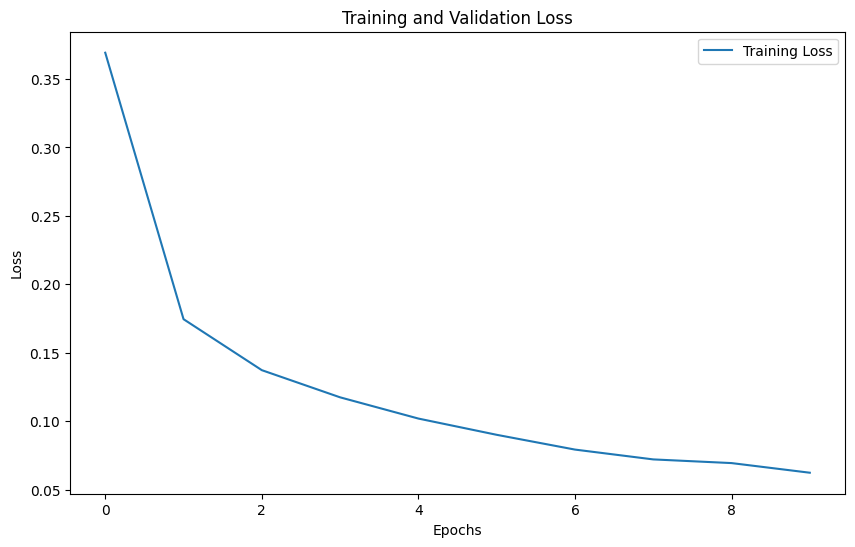

In [7]:
plot_loss_over_training(history)

For the dataset, the training is starting to converge after 7 epochs.

Thus, I would choose 7 as the best number of epochs for training

8. Constructing the new dataset using the average of all surronding pixels

In [8]:
# Importing uniform_filter from scipy to be able to construct the new dataset
from scipy.ndimage import uniform_filter

In [9]:
# Reloading the dataset
x_train, y_train, x_test, y_test = load_mnist()

# Creating the mean filtered images
x_train_filtered = np.array([uniform_filter(img, 3) for img in x_train])
x_test_filtered = np.array([uniform_filter(img, 3) for img in x_test])

Applying the model on the new dataset and calculating the measures

In [10]:
# Applying the model on the mean filtered MNIST dataset
cm, precision, recall, f1_score, sensitivity, specificity, accuracy, history = build_model(x_train_filtered, y_train, x_test_filtered, y_test)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3807 - accuracy: 0.8857 - val_loss: 0.1656 - val_accuracy: 0.9496
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1958 - accuracy: 0.9413 - val_loss: 0.1183 - val_accuracy: 0.9643
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1570 - accuracy: 0.9529 - val_loss: 0.1141 - val_accuracy: 0.9650
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1397 - accuracy: 0.9582 - val_loss: 0.1018 - val_accuracy: 0.9691
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1225 - accuracy: 0.9630 - val_loss: 0.0945 - val_accuracy: 0.9718
Epoch 6/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1139 - accuracy: 0.9657 - val_loss: 0.0932 - val_accuracy: 0.9716
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1036 - accuracy: 0.9683 - val_loss: 0.0892 - val_accura

In [11]:
print_results(cm, precision, recall, f1_score, sensitivity, specificity, accuracy)

Confusion Matrix:
[[ 969    0    1    1    1    1    2    1    3    1]
 [   0 1125    4    0    0    1    1    1    3    0]
 [   3    1 1016    0    1    0    1    7    3    0]
 [   0    0    9  985    0    4    0    8    4    0]
 [   0    2    4    0  937    0    6    3    0   30]
 [   2    0    0   17    1  860    3    1    4    4]
 [   6    2    0    1    4    6  936    0    3    0]
 [   1    3   13    2    0    0    0 1003    1    5]
 [   2    0    1    7    3    8    2    6  944    1]
 [   2    5    0    3    7    5    0    6    2  979]]
Precision: 0.9753611206146428
Recall: 0.9750192494365205
F1 Score: 0.9751541064677607
Sensitivity: 0.9750192494365205
Specificity: 0.49233639057196754


From the following confusion matrix, we can draw several key observations:

*   High accuracy of the model - the model achieved an overall accuracy of 97.54% which is an indication of high performance
*   There are some notable confusions between classes such as:
  * Similarly to the original model, class 4 and class 9 are being mutually confused.
  From that we can assume that even after the averaging process, some key features of the classes stay similar
  * Class 5 and class 3 are being mutually confused
  * Class 8 is often confused with class 3 and class 7

Overall the model kept a really good accuracy despite the averaging process.
However, some digits have more similar features after the averaging process which leads to higher rate of misclassification

Plotting the loss of the training

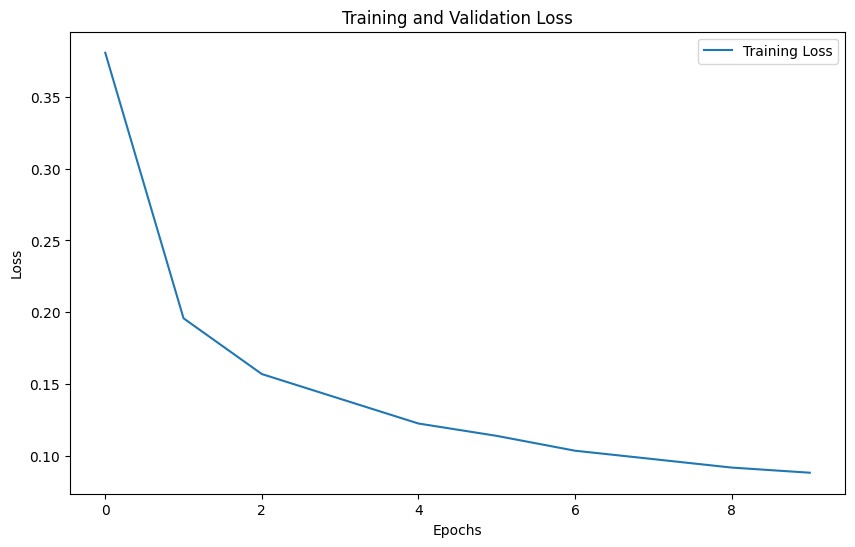

In [12]:
plot_loss_over_training(history)

For the constructed dataset, the training is starting to converge after 8 epochs.

Thus, I would choose 8 as the best number of epochs for training

9. Comparing the perfomance of the model on the original and constructed datasets:

In general, the accuracy of both models are pretty high.
But, there are some key differences in the performances of the models.

 * The model seems to classify class 2, class 8 and class 9 more accurately using the constructed dataset, indicating that averaging the pixels might have helped to better define these classes.
 * For class 0, class 3, class 4, class 5 and class 7 there seems to be a decrease in the accuracy of the model when using the constructed dataset.

Averaging the pixels might have blurred some critical distinguishing features for most classes (as most classes had a decrease in performance), which lead to increased misclassification.
This means that the model might rely on finer details as features that are smoothed out by the averaging process.

Overall the model keeps good accuracy for both dataset with a slight decrease in the performance on the construced dataset.


10. a - Performing dimension reduction using PCA

In [13]:
x_train, y_train, x_test, y_test = load_mnist()

x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

scaler = StandardScaler()

x_train_flatten = scaler.fit_transform(x_train_flatten)
x_test_flatten = scaler.transform(x_test_flatten)

pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_flatten)
x_test_pca = pca.transform(x_test_flatten)

Applying the model on the PCA dataset

In [14]:
cm, precision, recall, f1_score, sensitivity, specificity, accuracy, history = build_model_reduced(x_train_pca, y_train, x_test_pca, y_test, True)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.4949 - accuracy: 0.8601 - val_loss: 0.1904 - val_accuracy: 0.9472
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2478 - accuracy: 0.9301 - val_loss: 0.1536 - val_accuracy: 0.9559
Epoch 3/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1934 - accuracy: 0.9438 - val_loss: 0.1401 - val_accuracy: 0.9612
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1699 - accuracy: 0.9521 - val_loss: 0.1302 - val_accuracy: 0.9653
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1516 - accuracy: 0.9559 - val_loss: 0.1353 - val_accuracy: 0.9645
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1377 - accuracy: 0.9607 - val_loss: 0.1307 - val_accuracy: 0.9652
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1221 - accuracy: 0.9633 - val_loss: 0.1281 - val_accuracy:

In [15]:
print_results(cm, precision, recall, f1_score, sensitivity, specificity, accuracy)

Confusion Matrix:
[[ 966    0    4    2    1    1    4    1    1    0]
 [   0 1124    6    0    0    1    3    0    1    0]
 [   1    0 1008    1    3    1    5   11    2    0]
 [   0    0    5  985    0    5    0    8    7    0]
 [   1    0    9    0  944    1    5    6    1   15]
 [   3    0    0   10    1  856    7    3   10    2]
 [   5    3    2    0    8    4  934    0    1    1]
 [   2    5   12    5    3    0    0  992    2    7]
 [   5    4    3    5    6    8    4    6  930    3]
 [   3    4    1    8   11    2    1    9    2  968]]
Precision: 0.9706315275005897
Recall: 0.9703078607799492
F1 Score: 0.9704407452306418
Sensitivity: 0.9703078607799492
Specificity: 0.4891369204574878


From the following confusion matrix, we can draw several key observations:


*   High accuracy of the model - the model achieved an overall accuracy of 97.07% which is an indication of high performance
* Even though the accuracy of the model with the PCA is still pretty high, using PCA caused some classes to overlap in the reduced feature space, leading to a higher misclassification rate.
*   There are some notable confusions between classes such as:
  * Class 4 and class 9 are being mutually confused
  * Class 5 is being misclassified in a significant amount suggesting that there is a problem with distinguishing class 5 from others after the PCA dimension reduction
  especially comparing to class 3 and class 8
  * Class 8 is being misclassified in a significant amount suggesting that there is a problem with distinguishing class 8 from others after the PCA dimension reduction

Overall, the model is giving high accuracy on the PCA dataset.
However, the dimension reduction that happens because of the PCA may cause the lost of some key features that impact the model's ability to classify those classes correctly


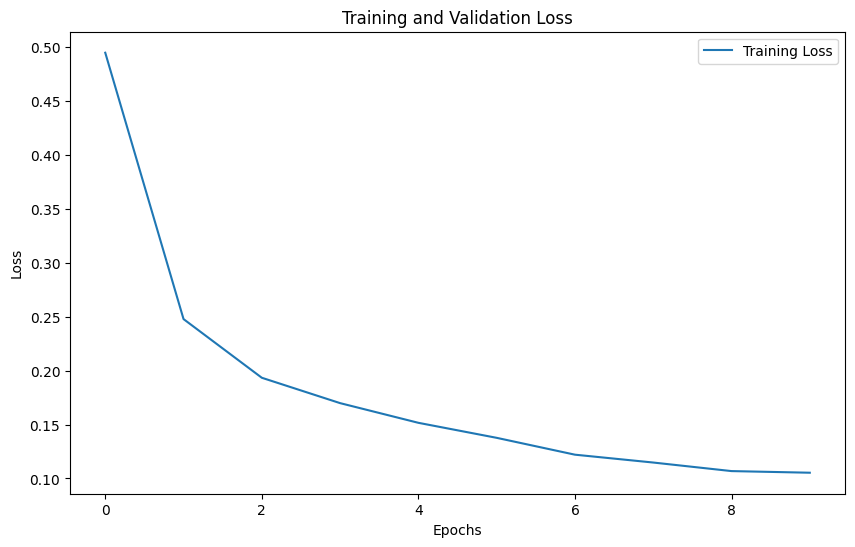

In [16]:
plot_loss_over_training(history)

For the constructed dataset, the training is starting to converge after 8 epochs.

Thus, I would choose 8 as the best number of epochs for training

Comparing the perfomance of the model on the original and the PCA datasets:

In general, the accuracy of both models are pretty high.
But, there are some key differences in the performances of the models.

 * Applying PCA usually leads to more dispersion in misclassification compared to the original dataset, which means that PCA reduces some unique features that might help classifying similar classes correctly.
 * Some classes show significant overlap after using PCA.
 * The dimension reduction of PCA can lead to a loss of important features, causing the increase in the confusion between classes that are similar in their features.
 * The model's performace shows robustness in accuracy even after the PCA, even though the precision and recall were affected by it.

10. b - Performing dimension reduction by replacing each non-overlapping 3x3 pixel block with its' average value

In [17]:
x_train, y_train, x_test, y_test = load_mnist()

x_train_block_avg = np.array([block_avg(img) for img in x_train])
x_test_block_avg = np.array([block_avg(img) for img in x_test])

In [18]:
cm, precision, recall, f1_score, sensitivity, specificity, accuracy, history = build_model_reduced(x_train_block_avg, y_train, x_test_block_avg, y_test, False)

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 0.5388 - accuracy: 0.8397 - val_loss: 0.2199 - val_accuracy: 0.9345
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2539 - accuracy: 0.9238 - val_loss: 0.1623 - val_accuracy: 0.9507
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1990 - accuracy: 0.9399 - val_loss: 0.1303 - val_accuracy: 0.9622
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1695 - accuracy: 0.9495 - val_loss: 0.1183 - val_accuracy: 0.9643
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1490 - accuracy: 0.9548 - val_loss: 0.1129 - val_accuracy: 0.9657
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1361 - accuracy: 0.9580 - val_loss: 0.1020 - val_accuracy: 0.9701
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1280 - accuracy: 0.9609 - val_loss: 0.0989 - val_accuracy

In [19]:
print_results(cm, precision, recall, f1_score, sensitivity, specificity, accuracy)

Confusion Matrix:
[[ 972    0    1    0    0    1    2    1    3    0]
 [   0 1124    2    1    0    1    2    0    5    0]
 [   6    1 1007    2    1    0    1    8    6    0]
 [   0    0    3  968    0   14    0   11   11    3]
 [   2    0    4    0  953    0    7    2    1   13]
 [   2    0    0    6    1  874    4    1    1    3]
 [   9    2    0    1    2    7  937    0    0    0]
 [   3    5   10    1    2    0    0 1000    1    6]
 [   1    0    2    7    2    7    4    8  939    4]
 [   4    4    0    5   16    1    0    7    3  969]]
Precision: 0.9740477209773836
Recall: 0.9741889674869857
F1 Score: 0.9740890094018226
Sensitivity: 0.9741889674869857
Specificity: 0.4845868509427988


From the following confusion matrix, we can draw several key observations:


*   High accuracy of the model - the model achieved an overall accuracy of 97.40% which is an indication of high performance
* Even though the accuracy of the model with the average 3x3 dimension reduction is pretty high, it affected the model's ability to classify correctly similar classes.
*   There are some notable classes overlap such as:
  * Class 4 and class 9 are being mutually misclassified
  * Class 3 and class 8 are being mutually misclassified.
  While class 3 is often confused with class 5
  * It's also notable that classes like class 1 and class 0 which have more unique features are less affected by the dimension reduction.

Overall, the model is giving high accuracy on the constructed dataset.
However, the dimension reduction that happens by the averaging process may cause the lost of some key features that impact the model's ability to classify those classes correctly


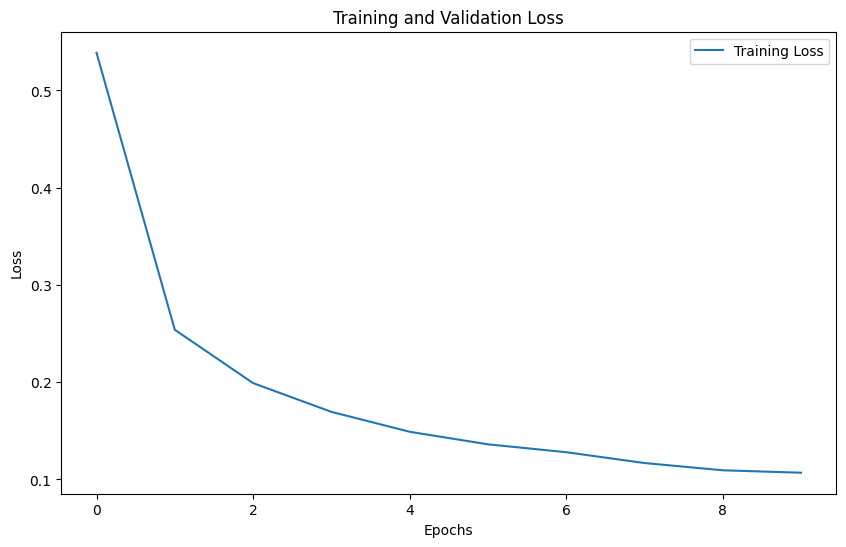

In [20]:
plot_loss_over_training(history)

For the undersampled dataset, the training is starting to converge after 7 epochs.

Thus, I would choose 7 as the best number of epochs for training

Comparing the perfomance of the model on the original and the constructed datasets:

In general, the accuracy of both models are pretty high.
But, there are some key differences in the performances of the models.

 * Applying a dimension reduction method such as block averaging, usually leads to more dispersion in misclassification compared to the original dataset, which means that some unique features that might help classifying similar classes correctly might be lost
 * Some classes show significant overlap after using the block averaging method.
 For example, class 4 is being misclassified as class 9 more often after the dimension reduction
 * The dimension reduction can lead to a loss of important features, causing the increase in the confusion between classes that are similar in their features

Overall the model keeps good accuracy for both datasets with a slight decrease for the constructed dataset

13. a - Performing undersampling for two classes within the existing 10 classes

In [21]:
x_train, y_train, x_test, y_test = load_mnist()

# Randomly selecting the 2 classes from which we do the undersample
class1, class2 = random.sample(range(0, 10), 2)
print('The selected classes for the undersampling are: ' + str(class1) + ' and ' + str(class2))

# Number of samples we retain from each class
sample_size = 100

indices1 = np.where(y_train == class1)[0]
indices2 = np.where(y_train == class2)[0]

np.random.shuffle(indices1)
np.random.shuffle(indices2)

indices1 = indices1[:sample_size]
indices2 = indices2[:sample_size]

remaining_indices = np.where((y_train != class1) & (y_train != class2))[0]

indices = np.concatenate([indices1, indices2, remaining_indices])
np.random.shuffle(indices)

x_train = x_train[indices]
y_train = y_train[indices]

The selected classes for the undersampling are: 0 and 8


Applying the model on the undersampled dataset

In [22]:
cm, precision, recall, f1_score, sensitivity, specificity, accuracy, history = build_model(x_train, y_train, x_test, y_test)

Epoch 1/10
1211/1211 [==============================] - 5s 4ms/step - loss: 0.3318 - accuracy: 0.9001 - val_loss: 0.1593 - val_accuracy: 0.9494
Epoch 2/10
1211/1211 [==============================] - 6s 5ms/step - loss: 0.1595 - accuracy: 0.9522 - val_loss: 0.1190 - val_accuracy: 0.9612
Epoch 3/10
1211/1211 [==============================] - 5s 4ms/step - loss: 0.1223 - accuracy: 0.9624 - val_loss: 0.1147 - val_accuracy: 0.9639
Epoch 4/10
1211/1211 [==============================] - 4s 3ms/step - loss: 0.0995 - accuracy: 0.9688 - val_loss: 0.0994 - val_accuracy: 0.9703
Epoch 5/10
1211/1211 [==============================] - 6s 5ms/step - loss: 0.0827 - accuracy: 0.9743 - val_loss: 0.0910 - val_accuracy: 0.9724
Epoch 6/10
1211/1211 [==============================] - 5s 4ms/step - loss: 0.0780 - accuracy: 0.9748 - val_loss: 0.0958 - val_accuracy: 0.9724
Epoch 7/10
1211/1211 [==============================] - 8s 7ms/step - loss: 0.0663 - accuracy: 0.9793 - val_loss: 0.0929 - val_accuracy:

In [23]:
print_results(cm, precision, recall, f1_score, sensitivity, specificity, accuracy)

Confusion Matrix:
[[ 851    1    7    0    1   22   77    5    0   16]
 [   0 1126    4    0    0    1    3    1    0    0]
 [   0    2 1012    6    1    1    4    6    0    0]
 [   0    0    2  993    0    7    0    5    0    3]
 [   0    0    2    1  963    0    5    1    0   10]
 [   0    1    0    8    2  874    7    0    0    0]
 [   0    2    0    1    3    6  946    0    0    0]
 [   1    4    7    6    1    1    0 1005    0    3]
 [   6   19   18  122   24   94   48    9  542   92]
 [   0    7    1    5   10    7    1    5    0  973]]
Precision: 0.9335644575850853
Recall: 0.9270588307959379
F1 Score: 0.9222716415015884
Sensitivity: 0.9270588307959379
Specificity: 0.3724547933343593


From the following confusion matrix, we can draw several key observations:


*   High accuracy of the model - the model achieved an overall accuracy of 93.35% which is an indication of high performance
* Even though the model performs well overall, there are some classes that show an increase in misclassifications for class 0 and class 8 which were the ones influenced by the undersampling
*   There are some notable classes overlap such as:
  * Class 0 is often misclassified as class 5 or class 6
  * Class 8 has high misclassification rates with most classes
  * Class 3 and class 9 are being mutually misclassified

Overall, the model is giving high accuracy on the constructed dataset.
However, the undersampling of class 0 and class 8 impacted the accuracy for these classes in a significant way.


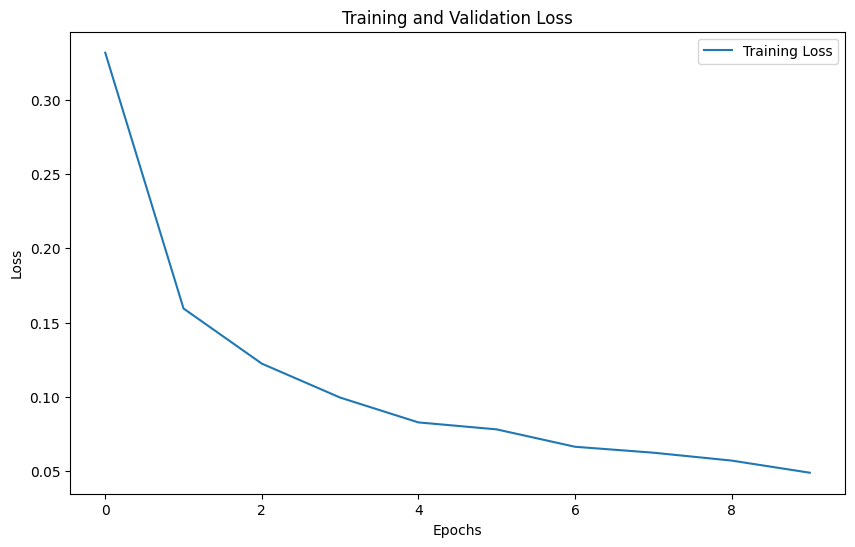

In [24]:
plot_loss_over_training(history)

For the undersampled dataset, the training seems to be starting to converge after 9 epochs.
Thus, I would choose 9 as the best number of epochs for training considering the model was trained for 10 epochs

Comparing the perfomance of the model on the original and the constructed datasets:

In general, the accuracy of both models are pretty high.
But, there are some key differences in the performances of the models.

 * Applying undersampling greatly affected the accuracy for the classes that were chosen for the undersampling (in this case class 0 and class 8), which overall affected the total accuracy of the model
 * The model shows consistency for the classes there weren't affected by the undersampling

Overall the model keeps good accuracy for both datasets.
However, there is a decrease in the accuracy when using the undersampled dataset

13. b - Performing oversampling for two classes within the existing 10 classes
and increasing the classes with image manipulation

In [25]:
x_train, y_train, x_test, y_test = load_mnist()

x_train = x_train / 255.0
x_test = x_test / 255.0

classes = random.sample(list(range(0, 10)), 2)
print('The selected classes for the oversampling are: ' + str(class1) + ' and ' + str(class2))

aug_num = 3

aug_images = []
aug_labels = []

for c in classes:
  aug_imgs, aug_label = augment_class_images(x_train, y_train, c, aug_num)
  aug_images.append(aug_imgs)
  aug_labels.append(aug_label)

aug_images = np.concatenate(aug_images, axis=0)
aug_labels = np.concatenate(aug_labels, axis=0)

x_train = np.concatenate([x_train, aug_images], axis=0)
y_train = np.concatenate([y_train, aug_labels], axis=0)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Building the NN
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make the predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, F1 score, sensitivity and specificty
precision = metrics.precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
recall = metrics.recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
f1_score = metrics.f1_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')

sensitivity = recall

# Calculate the confusion matrix to calculate the specificity
cm = sk.metrics.confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
tn = cm.sum(axis=1) - cm.diagonal()
fp = cm.sum(axis=0) - cm.diagonal()
fn = cm.sum(axis=1) - cm.diagonal()
specificity = tn / (tn + fp)
specificity = specificity.mean()

The selected classes for the oversampling are: 0 and 8
Epoch 1/10
2391/2391 [==============================] - 11s 4ms/step - loss: 0.3447 - accuracy: 0.8940 - val_loss: 11.3903 - val_accuracy: 0.2800
Epoch 2/10
2391/2391 [==============================] - 11s 5ms/step - loss: 0.1654 - accuracy: 0.9497 - val_loss: 16.1514 - val_accuracy: 0.2328
Epoch 3/10
2391/2391 [==============================] - 11s 5ms/step - loss: 0.1294 - accuracy: 0.9614 - val_loss: 21.5710 - val_accuracy: 0.2097
Epoch 4/10
2391/2391 [==============================] - 9s 4ms/step - loss: 0.1125 - accuracy: 0.9651 - val_loss: 23.5607 - val_accuracy: 0.2189
Epoch 5/10
2391/2391 [==============================] - 10s 4ms/step - loss: 0.0999 - accuracy: 0.9690 - val_loss: 29.4884 - val_accuracy: 0.1907
Epoch 6/10
2391/2391 [==============================] - 11s 5ms/step - loss: 0.0907 - accuracy: 0.9722 - val_loss: 31.9199 - val_accuracy: 0.2096
Epoch 7/10
2391/2391 [==============================] - 10s 4ms/step -

In [26]:
print_results(cm, precision, recall, f1_score, sensitivity, specificity, accuracy)

Confusion Matrix:
[[ 968    0    0    2    1    1    1    1    0    6]
 [   0 1127    3    0    0    0    1    0    3    1]
 [   5    2 1010    2    2    0    0    7    2    2]
 [   0    0    4  991    0    3    0    6    3    3]
 [   1    0    7    0  935    0    2    1    2   34]
 [   2    0    0   15    1  858    3    2    5    6]
 [   8    2    0    1    6    2  927    0    3    9]
 [   1    2   10    1    1    0    0 1006    2    5]
 [   4    0    3    4    3    3    1    4  949    3]
 [   3    3    0    5    4    1    0    4    3  986]]
Precision: 0.9760186006650431
Recall: 0.9752376777047331
F1 Score: 0.9755189558143075
Sensitivity: 0.9752376777047331
Specificity: 0.5170250692897305


From the following confusion matrix, we can draw several key observations:


*   High accuracy of the model - the model achieved an overall accuracy of 97.60% which is an indication of high performance
*   There are some notable classes overlap such as:
  * Class 4 is misclassified as class 9 in a significant amount
  * Class 2 is often misclassified as class 7
  * Class 5 is often misclassified as class 3

Overall, the model is giving high accuracy on the constructed dataset

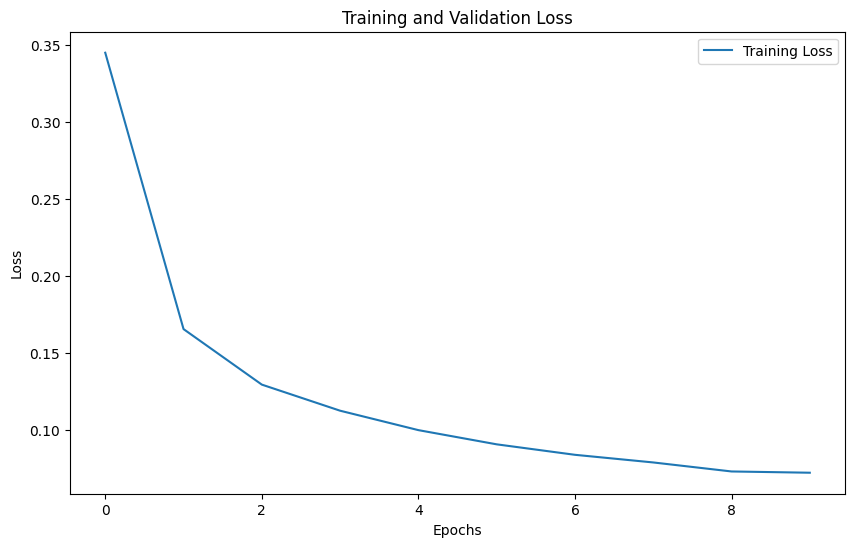

In [27]:
plot_loss_over_training(history)

For the oversampled dataset, the training is starting to converge after 8 epochs.

Thus, I would choose 8 as the best number of epochs for training

Comparing the perfomance of the model on the original and the constructed datasets:

In general, the accuracy of both models are pretty high.
But, there are some key differences in the performances of the models.

 * Applying oversampling affected the accuracy for the classes that weren't chosen for the oversampling, which overall affected the total accuracy of the model.
 However, the overall accuracy wasn't affected in a significant way
 * The model shows consistency for the classes there were chosen for the oversampling

Overall the model keeps good accuracy for both datasets with a slight decrease for the oversampled dataset